### Glass Quality Prediction

In [4]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import time

In [5]:
#Read data
data = pd.read_csv(r"D:\Triloki\Hack\AnalyticsIndiaMag\Glass_Quality_Participants_Data\Train.csv")
data.shape

(1358, 16)

### EDA

In [6]:
data.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [7]:
#Features name
data.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

In [8]:
#Count of classes
data["class"].value_counts()

1    887
2    471
Name: class, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  1358 non-null   int64  
 1   grade_A_Component_2  1358 non-null   int64  
 2   max_luminosity       1358 non-null   int64  
 3   thickness            1358 non-null   int64  
 4   xmin                 1358 non-null   int64  
 5   xmax                 1358 non-null   int64  
 6   ymin                 1358 non-null   int64  
 7   ymax                 1358 non-null   int64  
 8   pixel_area           1358 non-null   int64  
 9   log_area             1358 non-null   float64
 10  x_component_1        1358 non-null   int64  
 11  x_component_2        1358 non-null   int64  
 12  x_component_3        1358 non-null   int64  
 13  x_component_4        1358 non-null   int64  
 14  x_component_5        1358 non-null   int64  
 15  class                1358 non-null   i

In [10]:
#Descriptions of data
data.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [11]:
#number of 1 and 0 in features
col = ["grade_A_Component_1","grade_A_Component_2","x_component_1","x_component_2","x_component_3","x_component_4","x_component_5"]
for i in col:
    print(data[i].value_counts())

0    806
1    552
Name: grade_A_Component_1, dtype: int64
1    806
0    552
Name: grade_A_Component_2, dtype: int64
0    1247
1     111
Name: x_component_1, dtype: int64
0    1214
1     144
Name: x_component_2, dtype: int64
0    1090
1     268
Name: x_component_3, dtype: int64
0    1310
1      48
Name: x_component_4, dtype: int64
0    1320
1      38
Name: x_component_5, dtype: int64


In [12]:
data.corr()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
grade_A_Component_1,1.000000,-1.000000,-0.179342,0.102448,0.122591,0.090869,0.075011,0.074997,-0.288747,-0.288750,-0.060848,0.357737,-0.410352,-0.150293,-0.085870,-0.017173
grade_A_Component_2,-1.000000,1.000000,0.179342,-0.102448,-0.122591,-0.090869,-0.075011,-0.074997,0.288747,0.288750,0.060848,-0.357737,0.410352,0.150293,0.085870,0.017173
max_luminosity,-0.179342,0.179342,1.000000,-0.084196,-0.064511,-0.052570,-0.047701,-0.047675,0.093665,0.093664,-0.050434,-0.194116,0.150255,0.071122,0.018768,0.031459
thickness,0.102448,-0.102448,-0.084196,1.000000,0.132322,0.102853,-0.215164,-0.215179,-0.222397,-0.222396,0.067869,-0.027194,-0.345223,-0.098207,0.016376,0.329639
xmin,0.122591,-0.122591,-0.064511,0.132322,1.000000,0.986944,0.052343,0.052325,-0.373870,-0.373869,0.131579,-0.237880,-0.397686,0.071128,0.110482,0.147477
xmax,0.090869,-0.090869,-0.052570,0.102853,0.986944,1.000000,0.065922,0.065907,-0.264107,-0.264106,0.115860,-0.267536,-0.315293,0.058899,0.103368,0.130023
ymin,0.075011,-0.075011,-0.047701,-0.215164,0.052343,0.065922,1.000000,1.000000,0.006516,0.006514,0.016542,-0.071391,0.018013,-0.062412,0.051208,-0.092489
ymax,0.074997,-0.074997,-0.047675,-0.215179,0.052325,0.065907,1.000000,1.000000,0.006556,0.006553,0.016565,-0.071419,0.018027,-0.062421,0.051208,-0.092485
pixel_area,-0.288747,0.288747,0.093665,-0.222397,-0.373870,-0.264107,0.006516,0.006556,1.000000,1.000000,-0.098369,-0.112656,0.677638,-0.086455,-0.064310,-0.214127
log_area,-0.288750,0.288750,0.093664,-0.222396,-0.373869,-0.264106,0.006514,0.006553,1.000000,1.000000,-0.098368,-0.112655,0.677639,-0.086454,-0.064311,-0.214127


In [13]:
# import pandas_profiling 
# pandas_profiling.ProfileReport(data)
import warnings
warnings.filterwarnings("ignore")

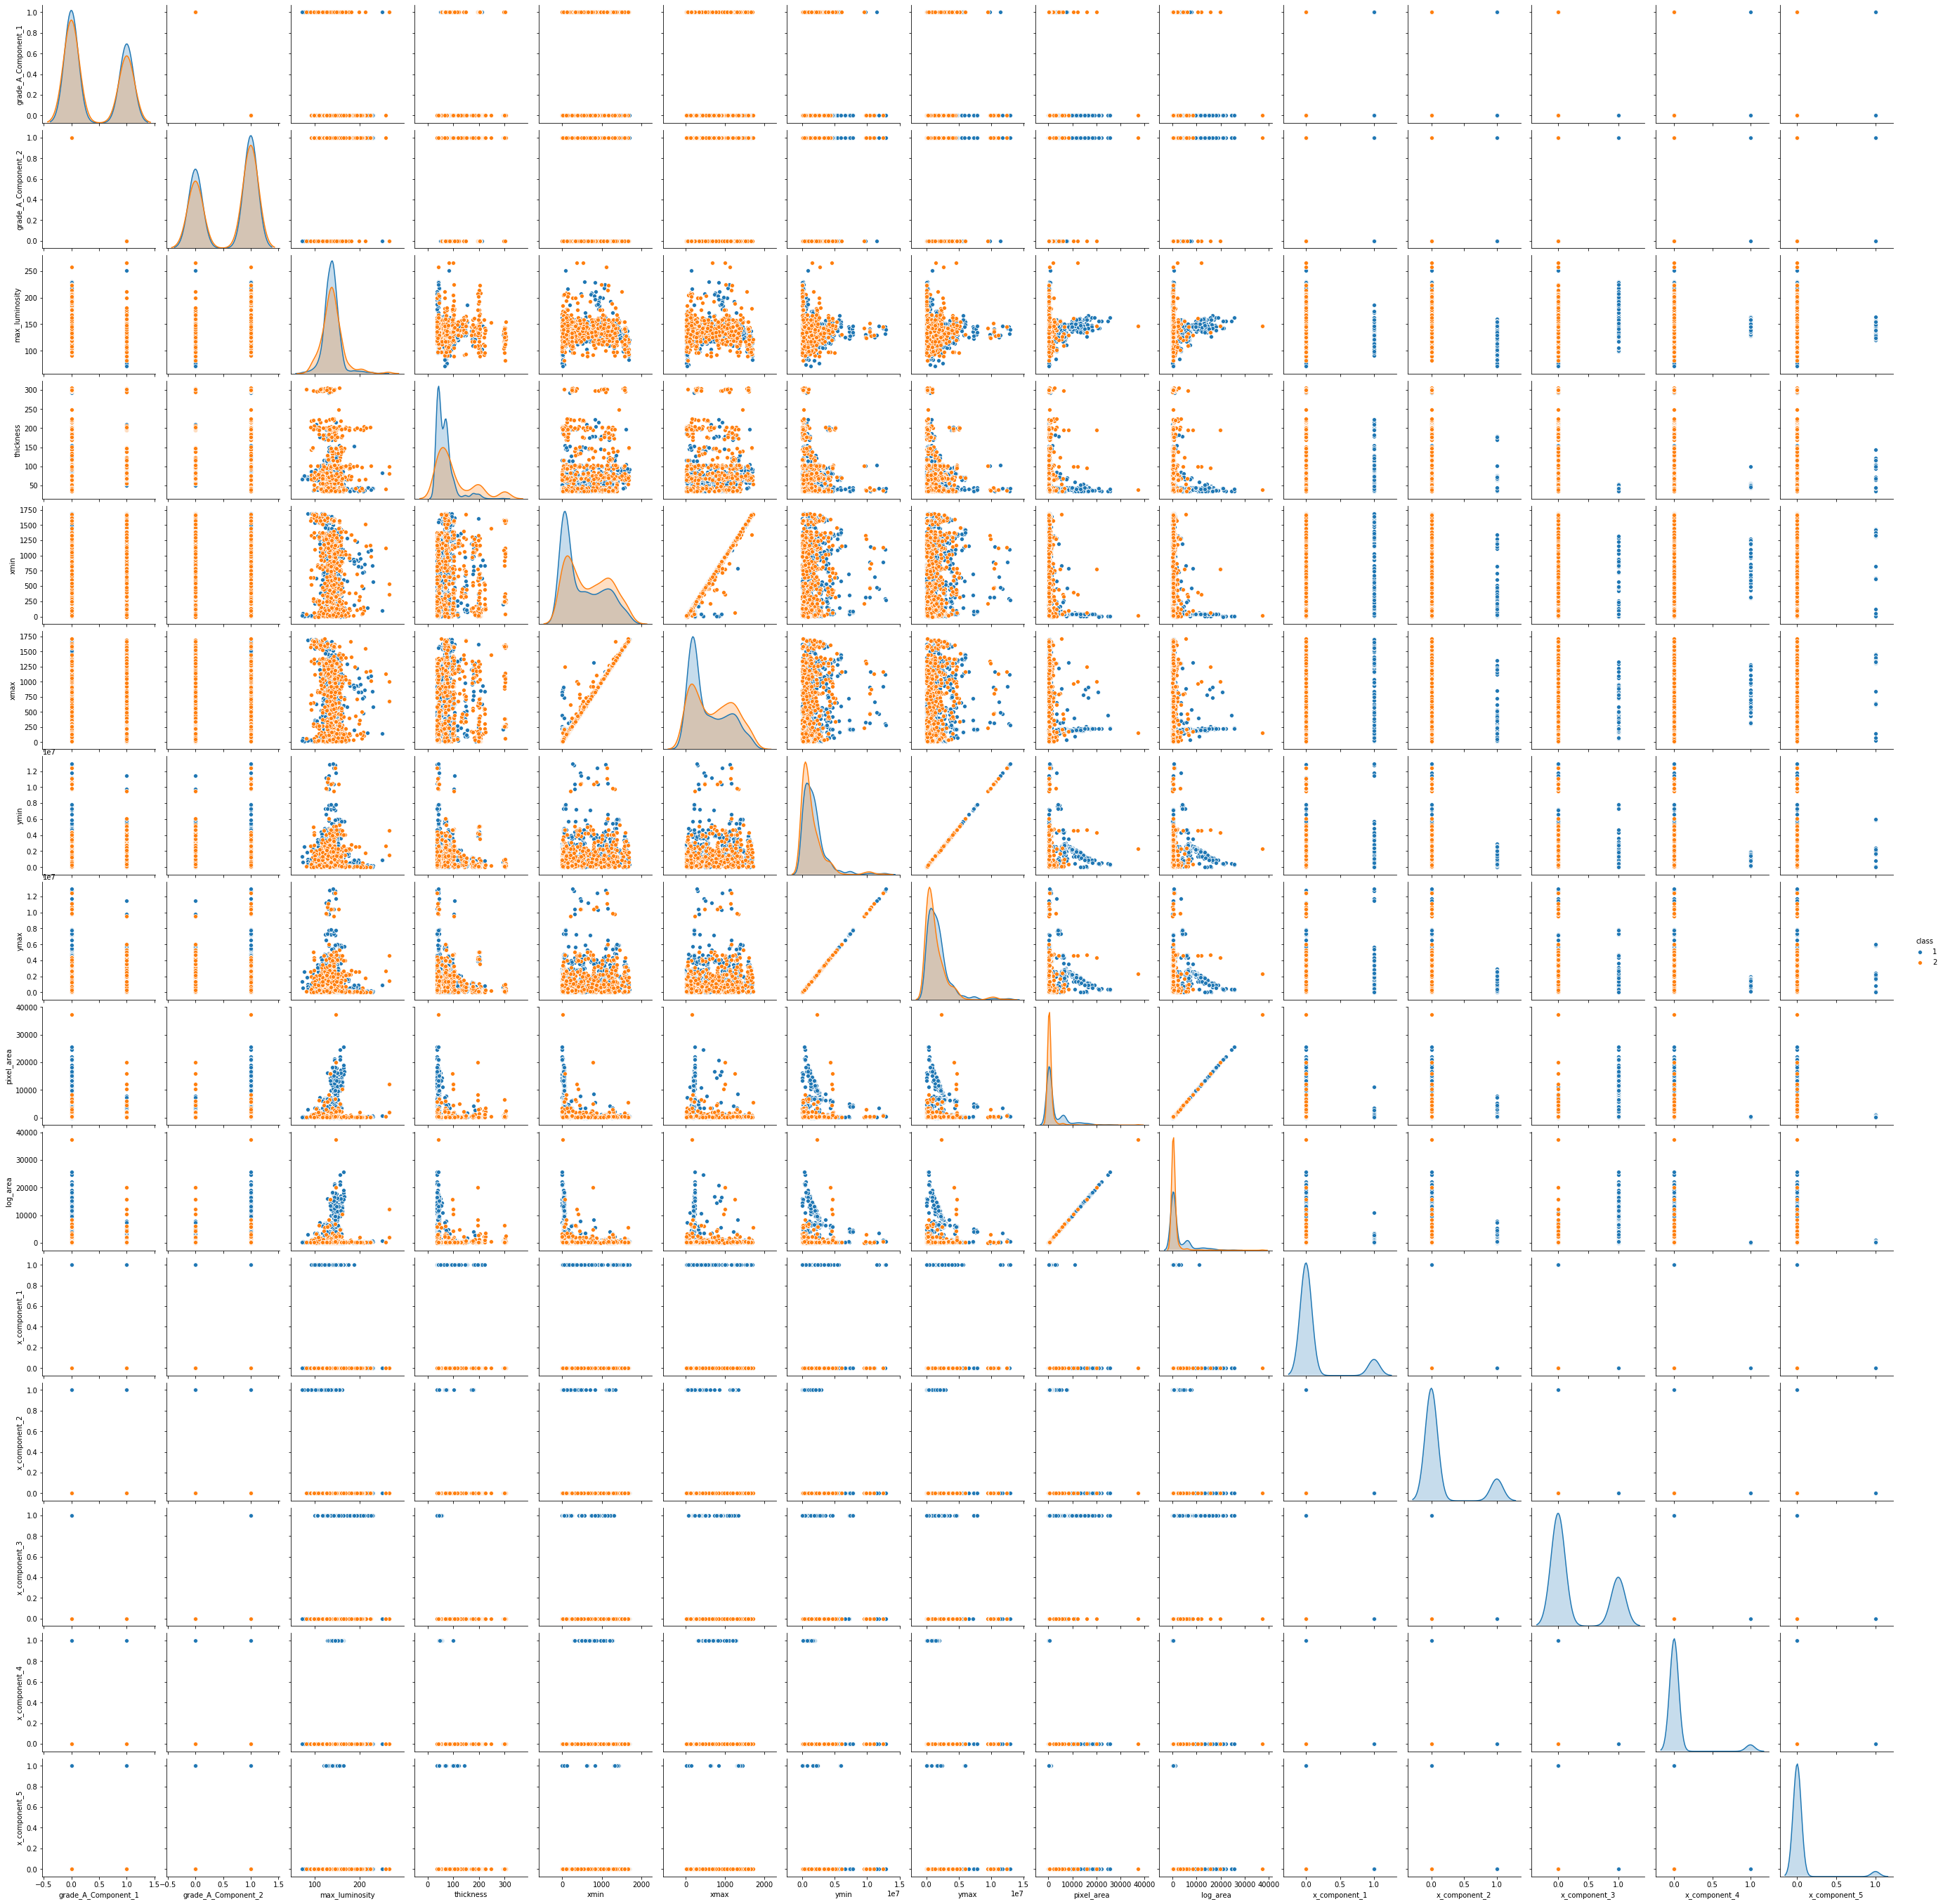

In [14]:
sns.pairplot(data, hue="class", height=2.5);

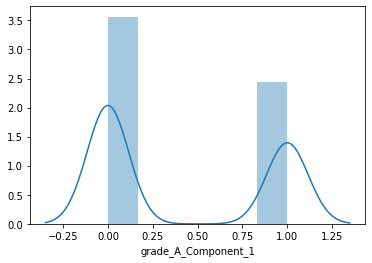

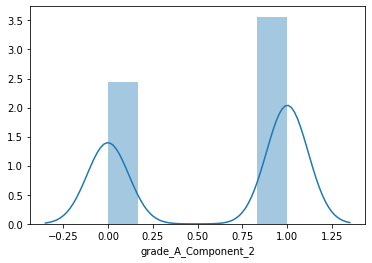

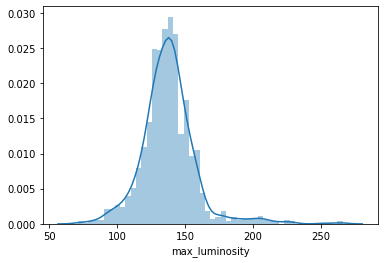

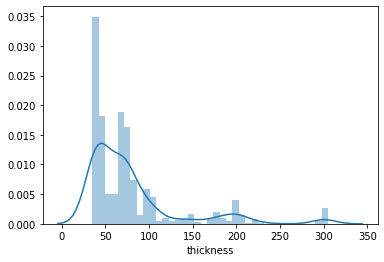

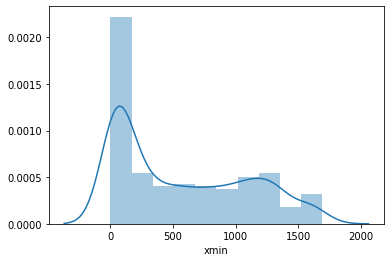

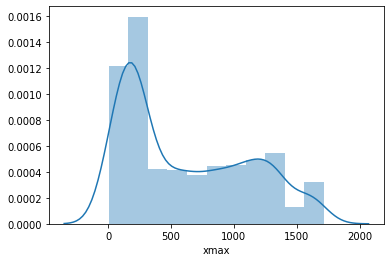

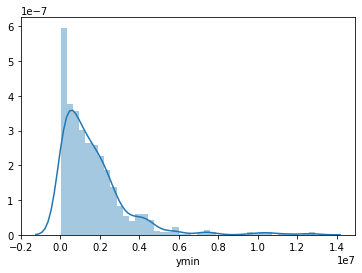

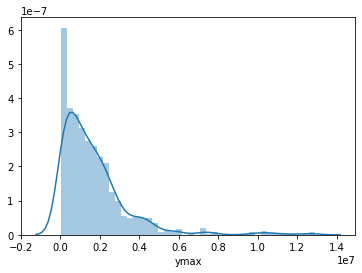

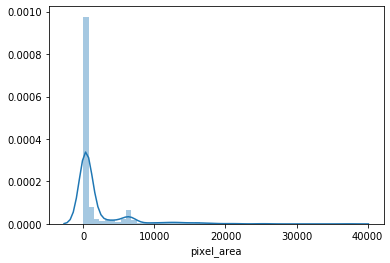

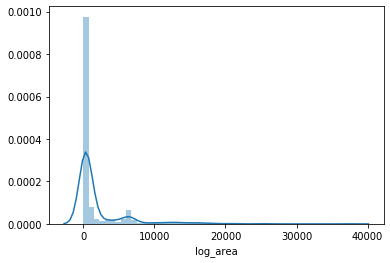

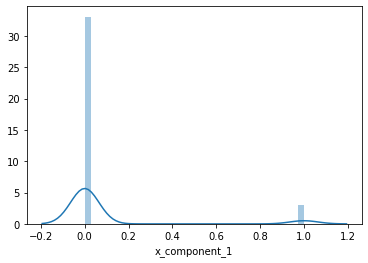

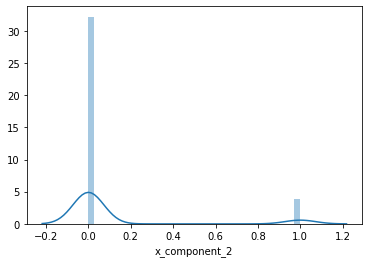

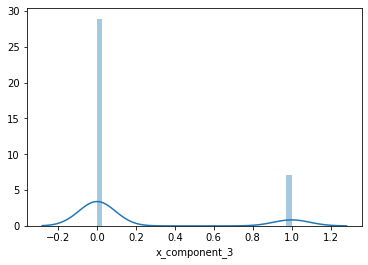

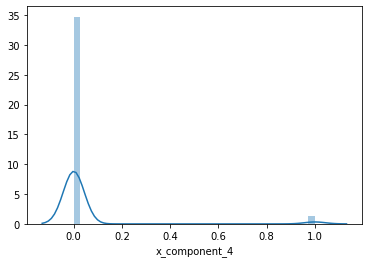

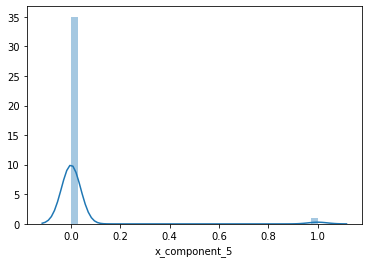

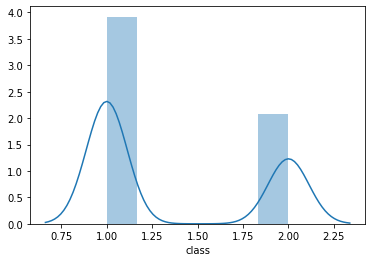

In [15]:
features = data.columns
for i in features:
    sns.distplot(data[i])
    plt.show()


### Model

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop(["class"], axis = 1)
y = data["class"]


In [17]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# rc=RobustScaler()
# X=rc.fit_transform(X)
# df_Test=rc.transform(test)

# sc=StandardScaler()
# X=sc.fit_transform(X)
# df_Test=sc.transform(test)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# model = RandomForestClassifier()
model = XGBClassifier()
# model = LogisticRegression()
# parameters = {'C':(0.01,0.1,1), 
#               'penalty':("l2",),
#              "solver":("lbfgs",),
#               "multi_class":("ovr","multinomial"),
#               "intercept_scaling":(.1,1,10)
#              }
# parameters = {'n_estimators':(10,100,1000,10000),
#               'criterion': ('gini', 'entropy'),
#               'max_features': ('auto', 'sqrt', 'log2','None'),
#               'class_weight': ('balanced', 'balanced_subsample', 'None')
    
# }
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
    'learning_rate':(0.001, 0.01, 0.1, 1, 10)
}
model = GridSearchCV(estimator = XGBClassifier(n_estimators=140, 
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
model.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_met

In [19]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [20]:
# model = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=2)
model = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)
# model = LogisticRegression(C=0.01, intercept_scaling=0.1, multi_class='multinomial')
model.fit(X, y)
# y_pred = model.predict(X_test)
# accuracy_score(y_test, y_pred)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [22]:
X_test= pd.read_csv(r"D:\Triloki\Hack\AnalyticsIndiaMag\Glass_Quality_Participants_Data\Test.csv")
X_test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [25]:
y_pred = pd.DataFrame(model.predict_proba(X_test))
y_pred.to_csv("D:\\Triloki\\Hack\\AnalyticsIndiaMag\\Glass_Quality_Participants_Data\\Sample_Submission.csv")

In [26]:
y_pred

,0,1
0,0.851429,0.148571
1,0.296022,0.703978
2,0.842093,0.157907
3,0.812150,0.187850
4,0.593055,0.406945
...,...,...
578,0.664049,0.335951
579,0.801517,0.198483
580,0.865519,0.134481
581,0.779592,0.220408


In [1]:
# summarize the fit of the model
# from sklearn import metrics
# print(); print(metrics.classification_report(y_test, y_pred))
# print(); print(metrics.confusion_matrix(y_test, y_pred))
# print(); print("Test: ", metrics.accuracy_score(y_test, y_pred))
# print(); print("Train: ", metrics.accuracy_score(y_train, model.predict(X_train)))